<img src="../assets/cover_image_PT4.png"/>

# Unsupervised Methods for Natural Language

Copyright, NLP from scratch, 2024.

[NLPfor.me](https://www.nlpfor.me)

------------

## Unsupervised Learning: Clustering

Here we will demonstrate a simple example of unsupervsied learning using the [K-Means clustering](https://en.wikipedia.org/wiki/K-means_clustering). In K-Means, the model tries to find a means which represent the centers of the different clusters in the feature space. The hyperparameter $k$ must be specified and is not learned - only the mean values for the $k$ cluster centers are learned by minimizing the distance to the points assigned to each cluster.

Let's see it in action, shall we?

First we will generate some synthetic data in a feature space:

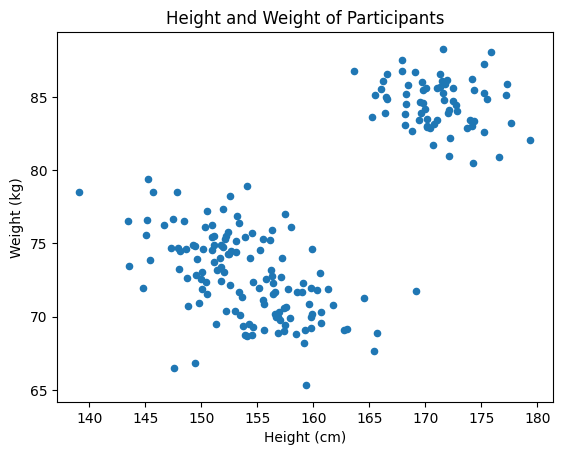

In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt

# Generate blobs data set
X, y = make_blobs(n_samples=200, centers=3, n_features=2, random_state=1, center_box=(150, 200), cluster_std=3.9)

# Scale
participant_df = pd.DataFrame(X, columns=['height', 'weight'])
participant_df['weight'] /= 2.2

# Plot
participant_df.plot(x='height', y='weight', kind='scatter')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height and Weight of Participants')
plt.show()

As we can see, there appear to be two distinct groups in the data. Or is it three? Let's apply K-Means clustering and see what happens.

In [2]:
from sklearn.cluster import KMeans

# Instantiate - specify 2 clusters
kmm = KMeans(n_clusters=2)

# Fit - there is no 'y' variable here as this is unsupervised learning
kmm.fit(participant_df)

KMeans(n_clusters=2)

After fitting the model, the cluster labels are stored in the attribute `labels_` and cluster centers in the attribute `cluster_centers_`:

In [3]:
print(kmm.labels_)

[1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0
 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1
 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0]


In [4]:
print(kmm.cluster_centers_)

[[171.09600046  84.38374037]
 [153.74612551  72.7612102 ]]


In [5]:
pd.DataFrame(kmm.cluster_centers_)

,0,1
0,171.096000,84.38374
1,153.746126,72.76121


As such, we can plot the data and color by cluster number and overplot the centers. First, we will add the predicted labels to the `participant` dataframe:

In [6]:
# Add to dataframe
participant_df['cluster'] = pd.Categorical(kmm.labels_)

Now we can plot and color by label:

<Figure size 640x480 with 0 Axes>

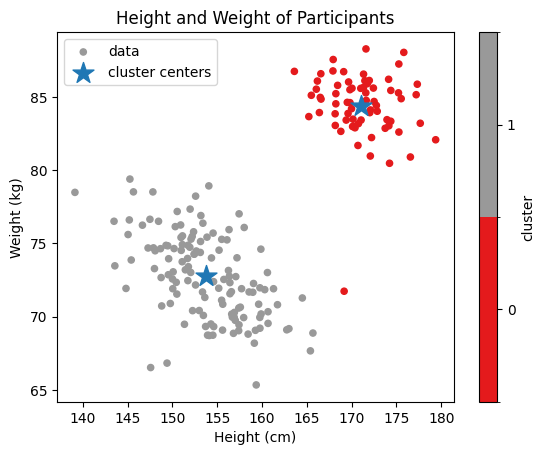

In [7]:
# Plot
plt.figure()
participant_df.plot(x='height', y='weight', c='cluster', cmap='Set1', kind='scatter', label='data')
plt.scatter(kmm.cluster_centers_[:,0], kmm.cluster_centers_[:,1], marker='*', s=250, label='cluster centers')
plt.legend()
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height and Weight of Participants')
plt.show()

Looks pretty good - there are clearly two different groups of participants in the study. Or are there? The number of clusters, $k$, is a [hyperparameter](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) we are free to choose. What is we choose $k = 3$?

<Figure size 640x480 with 0 Axes>

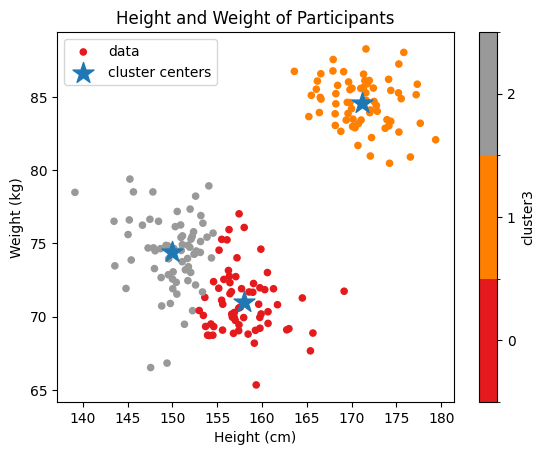

In [8]:
# Instantiate - specify 3 clusters
kmm3 = KMeans(n_clusters=3)

# Fit - only on height and weight columns
kmm3.fit(participant_df[['height', 'weight']])

# Add the cluster labels 
participant_df['cluster3'] = pd.Categorical(kmm3.labels_)

# Plot
plt.figure()
participant_df.plot(x='height', y='weight', c='cluster3', cmap='Set1', kind='scatter', label='data')
plt.scatter(kmm3.cluster_centers_[:,0], kmm3.cluster_centers_[:,1], marker='*', s=250, label='cluster centers')
plt.legend()
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height and Weight of Participants')
plt.show()

As we can see in the figure above, it is ambiguous what the 'correct' number of clusters should be and we should choose $k$ carefully accordingly.

## Topic Modeling

Now that we have applied unsupervised learning to data in general, we can more specifically apply approaches for unsupervised learning to an NLP dataset to do [topic modeling](https://en.wikipedia.org/wiki/Topic_model).

In practice, this is very similar to clustering, only in this case are data are the *document-term matrix* of our dataset and we apply topic-modeling specific algorithms such as [Latent-Dirichlet Allocation (LDA)](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation) which are known to perform well for text data.

Scikit-learn contains unsupervised methods for topic modeling, including [Latent Dirichlet Allocation (LDA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html) and Latent Semantic Analysis (LSA) via [Singular Value Decomposition](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html).

For this section, we will work through a simple example using the former, to see if we can extract topics from a given unlabelled dataset of text. Here we will use reviews from the [Amazon Reviews Dataset](https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/) collected by Julian McAuley at the University of California, San Diego. We will only be working with a sample of 25K reviews, specifically from the Software category.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
reviews_df = pd.read_csv('https://github.com/nlpfromscratch/datasets/raw/refs/heads/master/amazon_reviews/Amazon_SoftwareReviews_25K_sample.csv')

Let's take a look at what we're working with:

In [11]:
reviews_df.shape

(25000, 1)

### Data Preprocessing

First we must do the regular data preprocessing, as covered in [Part 2](https://github.com/nlpfromscratch/nlpfor.me/blob/master/notebooks/2.%20NLP%20for%20me%20-%20Data%20Acquisition%20and%20Preprocessing.ipynb) of the course, even though we are doing unsupervised learning. This is always a part of the workflow that must be carried out, regardless of the type of machine learning being applied (supervised or unsupervised).

In [12]:
reviews = reviews_df['reviewText']
reviews.head()

0    Arrive promptly,  Installed easily.  Works ver...
1    So I was searching for an anti virus since my ...
2    I switched to QuickBooks Online Plus when my c...
3    When I installed the software, all notes are d...
4    Fabulous upgrade, really great program - but i...
Name: reviewText, dtype: object

Now we perform the usual preprocessing steps:


*   Convert to lower case
*   Remove punctuation
*   Stemming
*   Remove stop words



In [13]:
import string

# Change to lower case
reviews = reviews.str.lower()

# Remove whitespace with regex
reviews = reviews.str.replace(r'[^\w\s]+', '')

# Special characters
reviews = reviews.str.replace("\n", " ")

# Remove punctuation
for mark in string.punctuation:
    reviews = reviews.str.replace(mark, '')

# check
reviews.head()

0    arrive promptly  installed easily  works very ...
1    so i was searching for an anti virus since my ...
2    i switched to quickbooks online plus when my c...
3    when i installed the software all notes are di...
4    fabulous upgrade really great program  but if ...
Name: reviewText, dtype: object

Finally, we apply TF-IDF vecctorization, which through sklearn takes care of removing stopwords for us:

In [14]:
# Tokenize and remove stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', min_df=0.01)

X = tfidf.fit_transform(reviews)

dtm = pd.DataFrame(X.todense(), columns=tfidf.get_feature_names_out())

Let's check:

In [15]:
dtm.head()

,10,100,11,12,15,20,2007,2008,2009,2010,...,write,writing,written,wrong,xp,year,years,yes,youll,youre
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.301339,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.263218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [16]:
X.shape

(25000, 758)

In [17]:
f'{X.shape[0]*X.shape[1]:,}'

'18,950,000'

Now we have a document-term matrix of 25,000 software reviews described by 758 different tokens which appear in the reviews, for a total of 18,950,000 million datapoints! 🤯

Now we can apply the LDA algorithm to look for topics within the reviews. Because we have a fairly large dataset, running the below cell may take a while! Note that like K-Means clustering, we must specify in advance the number of topics to search for as a hyperparameter, here by the parameter `n_components`:

In [18]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, n_jobs=-1)

lda.fit(X)

LatentDirichletAllocation(n_jobs=-1)

Now that the model has been fit, we can export the model components with respect to the different features from the document-term matrix:

In [19]:
topics_df = pd.DataFrame(lda.components_, columns=tfidf.get_feature_names_out())

topics_df.head(10)

,10,100,11,12,15,20,2007,2008,2009,2010,...,write,writing,written,wrong,xp,year,years,yes,youll,youre
0,37.975704,16.759290,18.348633,22.494795,16.083900,21.872509,3.181147,3.073937,1.641174,3.285660,...,39.121777,41.271265,29.105329,19.864195,7.138028,20.263271,58.953022,15.931948,33.446496,53.638598
1,74.987711,9.037371,4.836082,7.493664,7.034634,12.129037,4.399027,3.889711,1.771788,5.275011,...,5.474144,3.522720,4.098689,8.181706,172.151703,13.346228,33.058756,10.635290,15.721618,19.815206
2,9.791148,2.560543,14.071890,8.941933,0.890587,3.084818,0.349555,6.779825,20.141228,1.899659,...,1.359475,1.769953,0.286795,6.601852,3.138858,8.706129,21.170407,6.184968,1.657385,5.191853
3,21.634982,2.453705,1.291768,3.269931,10.447718,7.408478,0.100001,0.100005,0.100022,1.820857,...,3.340743,1.157247,0.100033,0.100042,0.100004,102.627281,137.743780,0.100002,0.348490,0.130337
4,10.666583,3.933755,4.323468,10.300274,9.399871,4.578272,0.100019,0.100006,0.100009,0.100003,...,6.989674,10.501373,1.376045,6.306330,1.843154,53.852138,20.135572,5.874168,6.554790,6.224526
5,13.590696,4.623758,1.970874,0.482641,4.586835,6.319304,2.068888,0.101523,2.498469,6.485770,...,0.100012,0.100030,0.100009,11.391015,1.874140,25.206519,19.092812,0.100030,0.502800,1.694562
6,17.254433,6.886297,0.328671,4.284776,9.201460,22.573063,1.442330,3.263967,1.601810,1.456953,...,0.511102,1.016469,1.542456,14.580028,0.100003,162.851468,104.764131,6.521112,4.009289,8.596807
7,36.064384,12.743879,10.612158,20.099223,17.072542,20.030875,3.911488,7.270191,3.546372,5.234510,...,15.439902,8.207530,8.204770,24.899466,20.211162,26.352170,37.090117,11.088306,5.292385,11.627120
8,15.140383,8.834546,0.559798,4.678208,6.512987,8.080750,6.508358,5.064844,11.049045,3.835202,...,1.332474,0.585908,1.769775,6.464602,8.135879,48.532747,105.318671,5.004670,7.376824,7.679329
9,17.742217,7.265403,1.986910,5.246726,14.349955,17.894334,87.817980,38.890694,22.582067,69.887880,...,11.155923,8.105110,4.884621,12.479010,6.377041,41.320845,111.119352,13.285081,7.840894,15.611320


The numbers in the components are not really meaningful on their own, however we can look at the largest values for each row (component) which represent the most salient words in each topic:

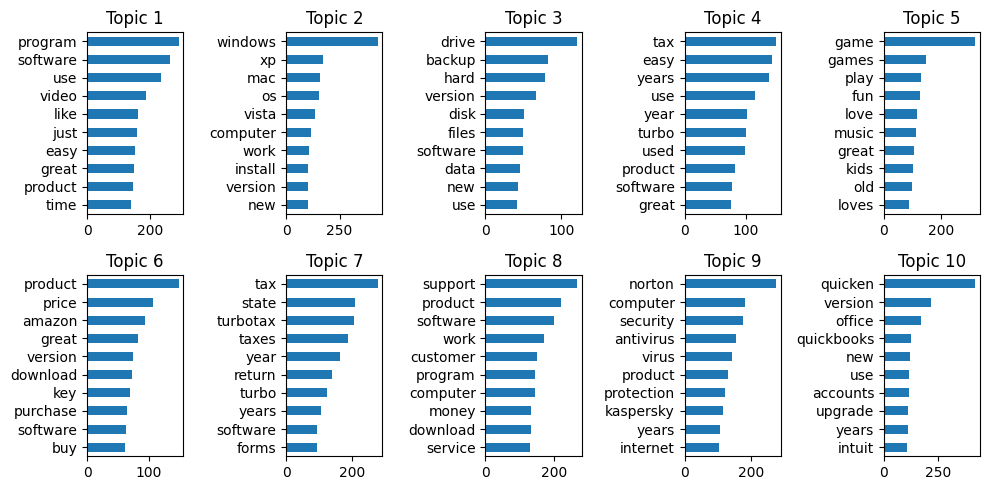

In [20]:
plt.subplots(2, 5, figsize=(10, 5))

for index, row in topics_df.iterrows():
    plt.subplot(2, 5, index+1)
    top_topics = row.nlargest(10).sort_values()
    top_topics.plot(kind='barh')
    plt.title(f'Topic {index+1}')

plt.tight_layout()
plt.show()

While some of the topics appear to be a bit general, so perhaps there could a better choice for the number to have specified in advance, we can see some that are clearly about particular themes (*e.g.* accounting software vs. gaming, antivirus & security, etc.)

## Embeddings

A *text embedding* is a representation of a text as numbers. There can be [word embeddings](https://en.wikipedia.org/wiki/Word_embedding), sentence embeddings such as those in the [SentenceTransformers](https://sbert.net/) library based on `SBERT`, or even embeddings for entire documents such as [doc2vec](https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html).

In this section, we will work with the `SentenceTransformers` library from Hugging Face to generate sentence embeddings. It is based upon Sentence-BERT or SBERT, an extension of the BERT encoder foundation model, done by researchers at the Ubiquitous Knowledge Processing Lab (UKP) at the University of TU Darmstadt in Germany. You can read the original paper on arXiv here: [Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks](https://arxiv.org/abs/1908.10084)

The simplest embedding model to use from the SentenceTransformers library is [all-MiniLM-L6-v2](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2), which maps sentences to a 384 dimensional dense vector space. It was trained on 1B sentence pairs and is based on a variation of the [MiniLM-L12-H384-uncased](https://huggingface.co/microsoft/MiniLM-L12-H384-uncased) model from Microsoft Research.

Let's take a look shall we?

In [47]:
# From the SentenceTransformers quickstart: https://www.sbert.net/docs/quickstart.html
from sentence_transformers import SentenceTransformer

# 1. Load a pretrained Sentence Transformer model
model = SentenceTransformer("all-MiniLM-L6-v2")

# The sentences to encode
sentences = [
    "The weather is lovely today.",
    "It's so sunny outside!",
    "He drove to the stadium.",
]

# 2. Calculate embeddings by calling model.encode()
embeddings = model.encode(sentences)
print(embeddings.shape)
# [3, 384]

# 3. Calculate the embedding similarities
similarities = model.similarity(embeddings, embeddings)
print(similarities)

(3, 384)
tensor([[1.0000, 0.6660, 0.1046],
        [0.6660, 1.0000, 0.1411],
        [0.1046, 0.1411, 1.0000]])


It is easy to calculate similarities and unlike a bag-of-words model, the embeddings recognize meaning, such as the fact that the sentences 'The weather is lovely today' and 'It's so sunny outside!' are similar even though they do not contain the same words. But what are the actual embeddings? 

In [49]:
embeddings

array([[ 0.01919576,  0.12008542,  0.15959832, ..., -0.00536283,
        -0.081095  ,  0.05021336],
       [-0.01869037,  0.0415187 ,  0.07431546, ...,  0.00486596,
        -0.06190438,  0.03187513],
       [ 0.13650198,  0.08227321, -0.02526165, ...,  0.08762047,
         0.03045842, -0.01075751]], dtype=float32)

In [50]:
embeddings.shape

(3, 384)

We can see that for the 3 documents, there are 3 vectors with 384 dimensions each. What do the different dimensions represent? Well, that's hard to say as they are abstract but do capture things like semantics well where approaches in traditional NLP (*i.e.* count vectorization) do not.

### Embeddings as Features for Machine Learning

Now, we will return to our example of the [IMDB review data](https://github.com/nlpfromscratch/datasets/tree/master/imdb) to see how embeddings can be used for machine learning.

First, let's load the data:

In [74]:
import pandas as pd

reviews_df = pd.read_csv('https://raw.githubusercontent.com/nlpfromscratch/datasets/refs/heads/master/imdb/imdb_reviews_sample.csv')

Now we can calculate the sentence embeddings using the model. This step will take a while! ⌛😴☕

In [75]:
reviews_sample = reviews_df.sample(500)
reviews_sample_raw = list(reviews_sample['review'])
embeddings = model.encode(reviews_sample_raw)

Now we can use these embeddings to train a machine learning model. We pull out the embeddings as our $X$, and the binary sentiment labels as our $y$:

In [76]:
X = embeddings 
y = reviews_sample['sentiment']

Now as before, we perform the train-test split. Here we use a 30% test set as before:

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Finally, we can fit our logistic regression model on the data:

In [78]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()

logit.fit(X_train, y_train)

print(logit.score(X_train, y_train))
print(logit.score(X_test, y_test))

0.84
0.72


### Comparison with Traditional NLP for Vectorization

We can see that our model is somewhat overfit, as the train score is higher than test. We can compare this to our traditional machine learning approach using count vectorization. Note that here we must perform an extra step of preprocessing the data beforehand:

In [79]:
import string

reviews = reviews_sample['review']

# Change to lower case
reviews = reviews.str.lower()

# Remove whitespace with regex
reviews = reviews.str.replace(r'[^\w\s]+', '')

# Special characters
reviews = reviews.str.replace("\n", " ")

# Remove punctuation
for mark in string.punctuation:
    reviews = reviews.str.replace(mark, '')

# check
reviews.head()

846     does exactly what you expect and then some the...
3189    i think walter pidgeon was badly miscast in th...
2914    while the romance in this film is an important...
3095    remade today this film would be a very creepy ...
2475    this is an excellent documentary about a story...
Name: review, dtype: object

Next, we vectorizer the data with the `CountVectorizer`:

In [80]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english', min_df=0.035)

X = cv.fit_transform(reviews)

Here, we can see that with keeping documents in 3.5% of the dataset or greater, we have ~400 features (this was done intentionally to have the # of features be similar to the 384 dimensions in the embedding above):

In [81]:
X.shape

(500, 409)

Now we perform the train-test split for this data, and fit our model:

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [83]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()

logit.fit(X_train, y_train)

print(logit.score(X_train, y_train))
print(logit.score(X_test, y_test))

0.9942857142857143
0.7


We can see that with a comparable number of features, our model based on the sentence embeddings was much less overfit, and also did not require the step of preprocessing.

<div align="right" float="right"><a href="https://www.github.com/nlpfromscratch/nlpfor.me" style="float: right; text-align: right; text-decoration: none; color: black">NLPfor.me 🔠⚡🤖🧠😃</a>